In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile
import matplotlib.pyplot as plt

2.12.0


### Basic Neural Network

In [ ]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')

In [ ]:
# Declare model inputs and outputs for training
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

In [ ]:
# Train the model
model.fit(xs, ys, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 438ms/step - loss: 49.5680
Epoch 2/500
1/1 [==============================] - 0s 6ms/step - loss: 39.3902
Epoch 3/500
1/1 [==============================] - 0s 6ms/step - loss: 31.3746
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 25.0605
Epoch 5/500
1/1 [==============================] - 0s 5ms/step - loss: 20.0851
Epoch 6/500
1/1 [==============================] - 0s 5ms/step - loss: 16.1632
Epoch 7/500
1/1 [==============================] - 0s 5ms/step - loss: 13.0702
Epoch 8/500
1/1 [==============================] - 0s 3ms/step - loss: 10.6294
Epoch 9/500
1/1 [==============================] - 0s 5ms/step - loss: 8.7021
Epoch 10/500
1/1 [==============================] - 0s 3ms/step - loss: 7.1788
Epoch 11/500
1/1 [==============================] - 0s 3ms/step - loss: 5.9735
Epoch 12/500
1/1 [==============================] - 0s 4ms/step - loss: 5.0185
Epoch 13/500
1/1 [==============================] -

In [ ]:
print(model.predict([10.0]))

1/1 [==============================] - 0s 68ms/step
[[18.976528]]


#### Downloading Fashion MNIST Dataset

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


LABEL: 9

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  82 187  26   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0   0 179 240 237 255 240 139  83  64  43  60  54   0   1]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0  58 239 222 234 238 246 252 254 255 248 255 187   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   3 

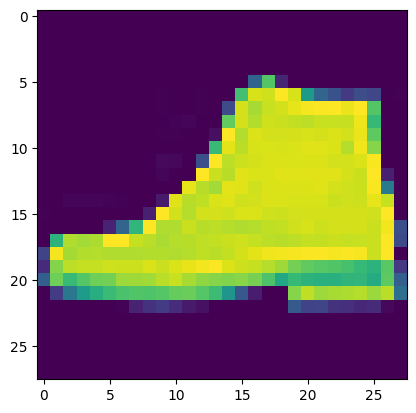

In [ ]:
# You can put between 0 to 59999 here
index = 42

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {train_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {train_images[index]}')

# Visualize the image
plt.imshow(train_images[index])

In [ ]:
# Normalize the pixel values of the train and test images
train_images  = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
from keras.backend import relu
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4895 - accuracy: 0.8280
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3753 - accuracy: 0.8649
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3327 - accuracy: 0.8797
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3116 - accuracy: 0.8855
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2944 - accuracy: 0.8921


In [ ]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.3618 - accuracy: 0.8673


[0.3618086576461792, 0.8672999739646912]

In [ ]:
classifications = model.predict(test_images)
print(classifications[0])

313/313 [==============================] - 2s 5ms/step
[5.1788629e-07 3.6288572e-08 2.5812247e-07 9.5313555e-07 2.4542126e-07 3.0877460e-03 5.9865505e-07 1.5384750e-01 1.5120392e-04 8.4291083e-01]


#### Increasing number of neurons in hidden layers

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3689 - accuracy: 0.8645
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3232 - accuracy: 0.8811
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2998 - accuracy: 0.8878
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2812 - accuracy: 0.8954
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2648 - accuracy: 0.9003


In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3362 - accuracy: 0.8806


[0.3361556828022003, 0.8805999755859375]

In [ ]:
classifications = model.predict(test_images)
print(classifications[0])

313/313 [==============================] - 2s 4ms/step
[4.1223835e-10 5.2677757e-13 8.3820384e-10 3.1999799e-15 1.5082947e-11 5.1299450e-03 4.8200905e-09 5.6666713e-03 1.5385270e-08 9.8920345e-01]


In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4703 - accuracy: 0.8309
Epoch 2/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3567 - accuracy: 0.8691
Epoch 3/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3189 - accuracy: 0.8832
Epoch 4/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2964 - accuracy: 0.8898
Epoch 5/15
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2777 - accuracy: 0.8967
Epoch 6/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2653 - accuracy: 0.9006
Epoch 7/15
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2516 - accuracy: 0.9054
Epoch 8/15
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2419 - accuracy: 0.9091
Epoch 9/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2289 - accuracy: 0.9145
Epoch 10/15
1875/1875 [==============================] - 14s 8ms/step - l

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3536 - accuracy: 0.8839


[0.3535706400871277, 0.883899986743927]

#### Without normalization

In [ ]:
#training_images=training_images/255.0 # Experiment with removing this line
#test_images=test_images/255.0 # Experiment with removing this line

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 15s 7ms/step - loss: 4.2821 - accuracy: 0.7734
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.5276 - accuracy: 0.8208
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.5125 - accuracy: 0.8257
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5090 - accuracy: 0.8291
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4858 - accuracy: 0.8363


In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.6576 - accuracy: 0.7811


[0.6576378345489502, 0.7810999751091003]

In [ ]:
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

313/313 [==============================] - 2s 7ms/step
[8.4639311e-07 1.4636145e-05 1.5565020e-07 7.2231916e-05 8.5094932e-08 5.8758818e-02 6.5917325e-06 1.3395208e-01 1.4032594e-05 8.0718058e-01]
9


#### Callbacks

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.6): # Experiment with changing this value
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
callbacks = myCallback()

training_images=training_images/255.0
test_images=test_images/255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1870/1875 [============================>.] - ETA: 0s - loss: 0.4748 - accuracy: 0.8294
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 17s 8ms/step - loss: 0.4748 - accuracy: 0.8294


#### Splitting in train test data

In [ ]:
# Instantiate the dataset API
fmnist = tf.keras.datasets.fashion_mnist

# Load the dataset
(x_train, y_train),(x_test, y_test) = fmnist.load_data()

# Normalize the pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training after reaching 60 percent accuracy

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    # Check accuracy
    if(logs.get('loss') < 0.4):

      # Stop if threshold is met
      print("\nLoss is lower than 0.4 so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

In [ ]:
# Define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
# Compile the model
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with a callback
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 19s 9ms/step - loss: 0.4772 - accuracy: 0.8299
Epoch 2/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.3606 - accuracy: 0.8682
Loss is lower than 0.4 so cancelling training!
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3607 - accuracy: 0.8681


### Convolutional Neural Networks

In [ ]:
# Define the model
model = tf.keras.models.Sequential([
                                                         
  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 800)               0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [ ]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


### Transfer Learning

In [1]:
# Download the pre-trained weights. No top means it excludes the fully connected layer it uses for classification.

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2023-06-07 15:03:24--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 74.125.137.128, 142.250.141.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   115MB/s    in 0.7s    

2023-06-07 15:03:25 (115 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [2]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers

# Set the weights file you downloaded into a variable
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Initialize the base model.
# Set the input shape and remove the dense layers.
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

# Load the pre-trained weights you downloaded.
pre_trained_model.load_weights(local_weights_file)

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = False

In [3]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

In [4]:
# Choose `mixed_7` as the last layer of your base model
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [5]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)           

# Append the dense network to the base model
model = Model(pre_trained_model.input, x) 

# Print the model summary. See your dense network connected at the end.
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [6]:
# Set the training parameters
model.compile(optimizer = RMSprop(learning_rate=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

### Image Augmentation

#### Dataset 01: Cats & Dogs Classification (Binary)

In [7]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip

--2023-06-07 15:09:29--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 74.125.137.128, 142.250.141.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   136MB/s    in 0.5s    

2023-06-07 15:09:30 (136 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [8]:
# Extract the archive
zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

# Define our example directories and files
base_dir = 'tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats') 

# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') 

# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') 

# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
# Train the model.
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 20,
            validation_steps = 50,
            verbose = 2)

Epoch 1/20
100/100 - 189s - loss: 0.3477 - accuracy: 0.8635 - val_loss: 0.1082 - val_accuracy: 0.9600 - 189s/epoch - 2s/step
Epoch 2/20
100/100 - 183s - loss: 0.2092 - accuracy: 0.9130 - val_loss: 0.1773 - val_accuracy: 0.9350 - 183s/epoch - 2s/step
Epoch 3/20
100/100 - 182s - loss: 0.2023 - accuracy: 0.9250 - val_loss: 0.1333 - val_accuracy: 0.9500 - 182s/epoch - 2s/step
Epoch 4/20
100/100 - 183s - loss: 0.1680 - accuracy: 0.9340 - val_loss: 0.0963 - val_accuracy: 0.9700 - 183s/epoch - 2s/step
Epoch 5/20
100/100 - 181s - loss: 0.1633 - accuracy: 0.9325 - val_loss: 0.0965 - val_accuracy: 0.9560 - 181s/epoch - 2s/step
Epoch 6/20
100/100 - 182s - loss: 0.1627 - accuracy: 0.9390 - val_loss: 0.0845 - val_accuracy: 0.9660 - 182s/epoch - 2s/step
Epoch 7/20
100/100 - 183s - loss: 0.1465 - accuracy: 0.9410 - val_loss: 0.0920 - val_accuracy: 0.9700 - 183s/epoch - 2s/step
Epoch 8/20
100/100 - 179s - loss: 0.1415 - accuracy: 0.9430 - val_loss: 0.1008 - val_accuracy: 0.9600 - 179s/epoch - 2s/step


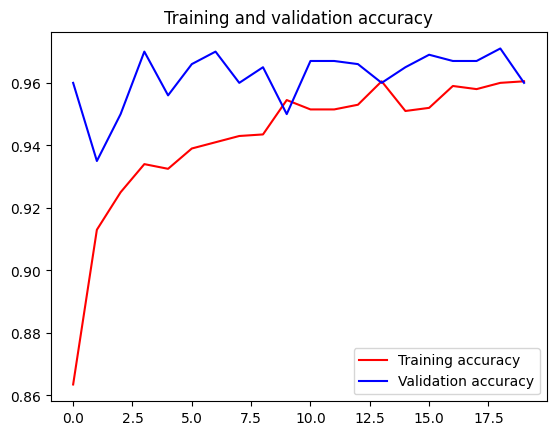

<Figure size 640x480 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

#### Dataset 02: Rock, Paper, Scissors (Multi-class)

In [11]:
# Download the train set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
    
# Download the test set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip

--2023-06-07 16:59:45--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 74.125.137.128, 2607:f8b0:4023:c0b::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip’

rps.zip             100%[===================>] 191.38M  84.6MB/s    in 2.3s    

2023-06-07 16:59:48 (84.6 MB/s) - ‘rps.zip’ saved [200682221/200682221]

--2023-06-07 16:59:48--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 74.125.137.128, 2607:f8b0:4023:c0b::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: 

In [12]:
import zipfile

# Extract the archive
local_zip = './rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/rps-train')
zip_ref.close()

local_zip = './rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/rps-test')
zip_ref.close()

In [13]:
import os

base_dir = 'tmp/rps-train/rps'

rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock07-k03-088.png', 'rock06ck02-021.png', 'rock07-k03-014.png', 'rock06ck02-087.png', 'rock04-037.png', 'rock03-011.png', 'rock05ck01-101.png', 'rock03-101.png', 'rock05ck01-039.png', 'rock03-064.png']
['paper02-102.png', 'paper07-049.png', 'paper07-053.png', 'paper05-096.png', 'paper04-002.png', 'paper07-048.png', 'paper06-007.png', 'paper07-046.png', 'paper01-097.png', 'paper07-097.png']
['testscissors03-049.png', 'scissors01-001.png', 'scissors02-110.png', 'testscissors02-110.png', 'scissors03-046.png', 'testscissors01-083.png', 'scissors01-069.png', 'scissors02-036.png', 'testscissors02-091.png', 'scissors01-085.png']


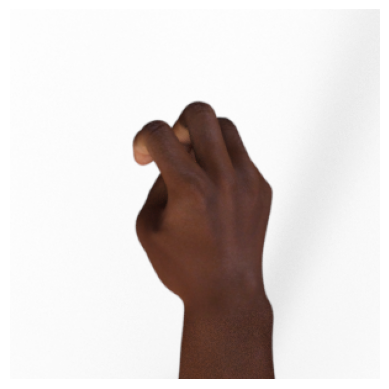

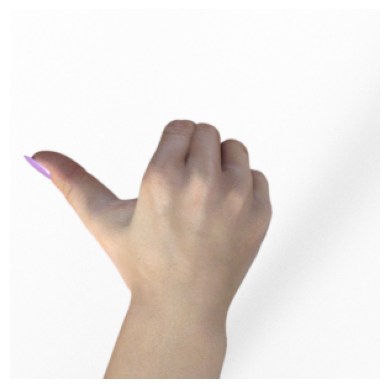

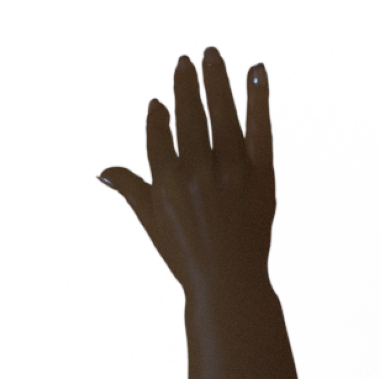

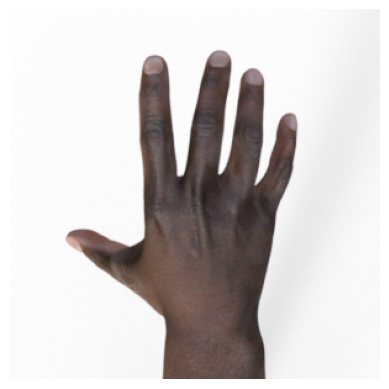

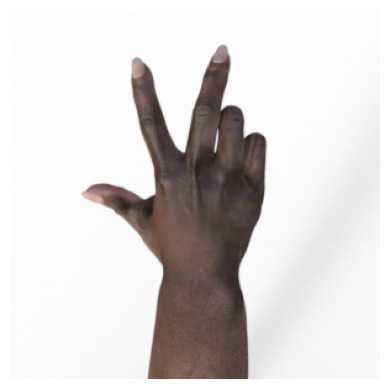

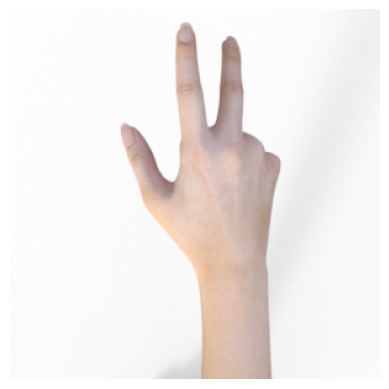

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [15]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_94 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_95 (Conv2D)          (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_96 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)      0

In [17]:
 # Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [20]:
TRAINING_DIR = "tmp/rps-train/rps"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "tmp/rps-test/rps-test-set"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
TRAINING_DIR, target_size=(150,150), class_mode='categorical', batch_size=126)

validation_generator = validation_datagen.flow_from_directory(
VALIDATION_DIR, target_size=(150,150), class_mode='categorical', batch_size=126)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [21]:
history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

Epoch 1/25
20/20 [==============================] - 237s 12s/step - loss: 1.1273 - accuracy: 0.3472 - val_loss: 1.0747 - val_accuracy: 0.3548
Epoch 2/25
20/20 [==============================] - 224s 11s/step - loss: 1.1018 - accuracy: 0.3861 - val_loss: 1.0837 - val_accuracy: 0.3333
Epoch 3/25
20/20 [==============================] - 225s 11s/step - loss: 1.0271 - accuracy: 0.4563 - val_loss: 0.6319 - val_accuracy: 0.6613
Epoch 4/25
20/20 [==============================] - 225s 11s/step - loss: 1.0852 - accuracy: 0.4325 - val_loss: 0.8553 - val_accuracy: 0.6478
Epoch 5/25
20/20 [==============================] - 228s 11s/step - loss: 0.8929 - accuracy: 0.5683 - val_loss: 0.4809 - val_accuracy: 0.7016
Epoch 6/25
20/20 [==============================] - 238s 12s/step - loss: 0.8110 - accuracy: 0.6020 - val_loss: 0.3612 - val_accuracy: 0.8737
Epoch 7/25
20/20 [==============================] - 225s 11s/step - loss: 0.6906 - accuracy: 0.6841 - val_loss: 0.3139 - val_accuracy: 0.9409
Epoch 

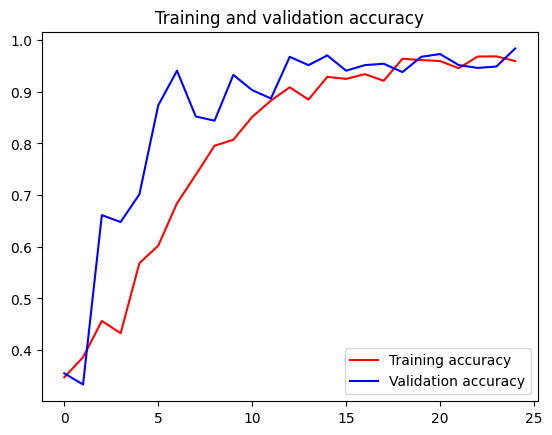

<Figure size 640x480 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

Testing on Unseen Images

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

----------------------------------------------xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx-------------------------------------------